In [1]:
'''TASK 1(a)'''
import pandas as pd
file = pd.read_csv('winequality-red.csv',sep=';')
file.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
print(file.columns)
print(file.shape)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [3]:
'''Task 1(b)'''
category = ['Class2' if i<=5 else 'Class1' for i in file['quality']]
file['Category'] = category

In [4]:
file.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Class2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Class2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Class1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2


In [5]:
'''Task 1(c)'''
C1 = file[file['Category']=='Class1']
print(C1.shape)

(855, 13)


In [6]:
C2 = file[file['Category']=='Class2']
print(C2.shape)

(744, 13)


In [7]:
file.groupby('Category').count()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Category,,,,,,,,,,,,
Class1,855,855,855,855,855,855,855,855,855,855,855,855
Class2,744,744,744,744,744,744,744,744,744,744,744,744


In [8]:
'''Task 1(d)'''
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
sns.boxplot(x='Category',y='alcohol',data=file,hue='Category')
plt.xlabel('Category')
plt.ylabel('alcohol %')
plt.title('Category vs Alcohol %')



Text(0.5, 1.0, 'Category vs Alcohol %')

Text(0.5, 1.0, 'pH vs Alcohol %')

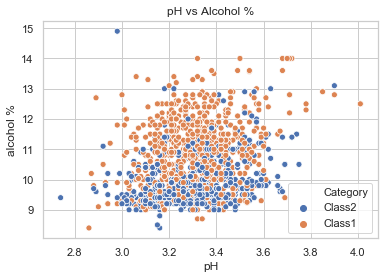

In [9]:
'''Task 1(e)'''
sns.scatterplot(x='pH',y='alcohol',data=file,hue='Category')
plt.xlabel('pH')
plt.ylabel('alcohol %')
plt.title('pH vs Alcohol %')


In [10]:
'''Task 2(f) Prior Probability'''
S=len(file['Category'])
print(S)
E1=file['Category'].value_counts()[0]
print(E1)
P_Class1 = E1/S
print(P_Class1)

1599
855
0.5347091932457786


In [11]:
E2=file['Category'].value_counts()[1]
P_Class2 = E2/S
print(P_Class2)

0.4652908067542214


In [12]:
'''Task 2(g) Conditional Probability'''
ph=['T' if i>3.6 else 'F' for i in file['pH']]
file['pH>3.6']=ph
file.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category,pH>3.6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2,F
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Class2,F
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Class2,F
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Class1,F
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2,F


In [13]:
''' Here I count the number of true values in the pH>3.6 attribute'''
P = file['pH>3.6'].value_counts()[1]
print(P)

48


In [14]:
'''Probability of pH>3.6'''
N=len(file['pH'])
P_pH = P/N
print(P_pH)

0.0300187617260788


In [15]:
'''Here I match one column attribute with another column '''
M=file.loc[(file['Category']=='Class1') & (file['pH>3.6']=='T')]
M.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category,pH>3.6
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6,Class1,T
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,Class1,T
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,Class1,T
245,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.9983,3.61,0.96,9.9,6,Class1,T
249,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.9983,3.61,0.96,9.9,6,Class1,T


In [16]:
'''Here I calculate the probability of intersection of both Class1 and pH>3.6'''
P_Common=M['Category'].count()
I=P_Common/S
print(I)


0.015634771732332707


In [17]:
'''Conditional Probability'''
Cond_Prob = I/P_Class1
print(Cond_Prob)

0.029239766081871343


In [18]:
'''Task 2(h) Posterior Probability'''
H=(Cond_Prob*P_Class1)/P_pH
H

0.5208333333333333